# Issue 9: Add hybridization for select modes using PN class from positive

In [1]:
# Setup ipython environment
%load_ext autoreload
%autoreload 2
%matplotlib inline
# The Important Things
from positive import *
from positive.physics import pn
from positive.maths import lim
from matplotlib.pyplot import *
from nrutils import scsearch,gwylm
from nrutils.core.nrsc import gwfcharstart
from positive.physics import mishra
from numpy import *
# Import hybrid class from nrutils 
from nrutils.manipulate.hybridize import make_pnnr_hybrid

(positive)>> Applying custom matplotlib settings.


### Find a simulation

In [2]:
A = scsearch(keyword='q4a0_T_112_448',apply_remnant_fit=True,verbose=True)
# A = scsearch(q=2,keyword='hr-s',verbose=True,nonprecessing=True,apply_remnant_fit=True,institute='gt')
# A = scsearch(keyword='q18a0a08_prad3a_96',verbose=True) # q18a0a0c025_144, q18a0a04c025_96_fine, q18a0aM08c025_96_fine, q18a0a08_prad3a_96

(scsearch)>> Found apply_remnant_fit (=True) keyword.
(scsearch)>> Found keyword (=q4a0_T_112_448) keyword.
(scsearch)>> Found verbose (=True) keyword.
(scsearch)>> List of keywords or string keyword found: ALL scentry objects matching will be passed. To pass ANY entries matching the keywords, input the keywords using an iterable of not of type list.
(scsearch!)>> Applying remant fit to scentry objects. This should be done if the final mass and spin meta data are not trustworth. The fit being used only works for non-precessing systems.
## Found 3 possibly degenerate simulations:
[0001][silures] BAM: ns-q4.00	(q4a0_T_112_448)
[0002][silures] BAM: ns-q4.00	(q4a0_T_112_448)
[0003][silures] BAM: ns-q4.00	(q4a0_T_112_448)



### Load the waveform data

In [4]:
y = gwylm( A[0], lmax=3, clean=False, dt=0.5, verbose=True )

(gwylm)>> Found dt (=0.5) keyword.
(gwylm)>> Found lmax (=3) keyword.
(gwylm)>> Found scentry_obj (=<nrutils.core.nrsc.scentry instance at 0x112083cf8>) keyword.
(gwylm)>> Found verbose (=True) keyword.
(gwylm)>> The (extraction_parameter,level) is (5,6), which differs from the config values of (5,5). You have either manually input the non-config values, or the handler has set them by looking at the contents of the simulation directory. 
(__make_lmlist__)>> The following spherical multipoles will be loaded:[(2, -2), (2, -1), (2, 0), (2, 1), (2, 2), (3, -3), (3, -2), (3, -1), (3, 0), (3, 1), (3, 2), (3, 3)]
(load)>> Loading: psi3col.r5.l6.l2.m-2.gz
(straighten_wfarr!)>> The time series has been found to be non-monotonic. We will sort the data to enforce monotinicity.
(straighten_wfarr!)>> The waveform time series is now monotonic.
(straighten_wfarr!)>> Repeated time values were found in the array. Offending rows will be removed.
(load)>> Imposing a default padding of 3 to the data.
(pad

In [6]:

# for lm in y.lm:
#     print lm

#     try:
#         go = True
#         bar = gwfcharstart( y[lm]['psi4'] )
#     except:
#         go = False
#         alert('the algo failed here')
        
#     ax,fig = y[lm]['psi4'].plot()
#     for a in ax:
#         sca(a)
#         if a is ax[0]: 
#             yscale('log',nonposy='clip')
#             ylim([1e-7,6e-3])
#         if go: axvline( y.t[bar.left_index] )
#         if go: axvline( y.t[bar.right_index] )
#         #
#         axvline( y.t[y.startindex], color='r' )
#         axvline( y.t[y.endindex_by_amplitude], color='r', ls='--' )
#         axvline( y.t[y.startindex]+4*pi/y.wstart_pn, color='r' )
#     show()

### Package development

In [16]:
# -~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~ #
# Create instance of hybird workflow
# -~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~ #

#
y.__calc_radiated_quantities__()
# strain_w_orb_min = y.lm[2,2]['strain'].dphi[y.remnant['mask']][0]/2
strain_w_orb_min = y.wstart_pn/2

pnwmin = 0.80*strain_w_orb_min
pnwmax = 2*strain_w_orb_min

# pnwmin = max(0.0025,0.5*strain_w_orb_min)
# pnwmax = 1.5*strain_w_orb_min

# Initiate class instance
s = make_pnnr_hybrid( y,                     # gwylm obj 
                      pn_w_orb_min=pnwmin,   # start of PN freq 
                      pn_w_orb_max=pnwmax,   #   end of PN freq 
                      verbose=True)


# -~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~ #
(make_pnnr_hybrid)>> Validating inputs
# -~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~ #

(__validate_inputs__)>> Verbose mode ON.
(__validate_inputs__)>> Valid gwylm object found. Its simulation name is "q4a0_T_112_448".
(__validate_inputs__)>> PN w_orb MIN frequency is 0.017015 (i.e. w_orb*M_init)
(__validate_inputs__)>> PN w_orb MAX frequency is 0.042539 (i.e. w_orb*M_init)

# -~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~ #
(make_pnnr_hybrid)>> Generating PN multipoles
# -~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~ #

(pn)>> Now constructing instance of the pn class.
(pn)>> Defining the initial binary state based on inputs.
(__validative_constructor__)>> Rescaling masses so that m1+m2=1
(__calc_orbital_frequency__)>> Calculating evolution of orbital phase using RK4 steps.
(__calc_com_binding_energy__)>> Calculating COM binding energy
(__calc_hlm_of_t__)>> Calculating the (l,m)=(2,2) spherical multipole.


#### Write general optimizer for format_aligned data

(__calc_l2m2_hybrid_params__)>> Plots will be generated.
(__calc_l2m2_hybrid_params__)>> The l=m=2 psi4 will be used for determining (initial) optimal hybrid params.
(__calc_l2m2_hybrid_params__)>> Aligning formats of NR and PN data
(format_align)>> Verbose mode ON.
(format_align)>> Setting domains to start at zero.
(format_align)>> Choosing the smallest domain spacing for calculation of common domain.
(format_align)>> Interpolating data to common domain.
(format_align)>> Done.
(format_align!)>> Inputs already in the same format. You may wish to apply domain transformations (e.g. time shifts) outside of this function.
(__calc_l2m2_hybrid_params__)>> Storing hybrid time series.
(__calc_l2m2_hybrid_params__)>> We will use 1 cycles for the hybridization region's width.
(__calc_l2m2_hybrid_params__)>> Finding optimal time-shift using scipy.optimize.minimize
(__calc_l2m2_hybrid_params__)>> Storing optimal params to this.optimal_hybrid_params


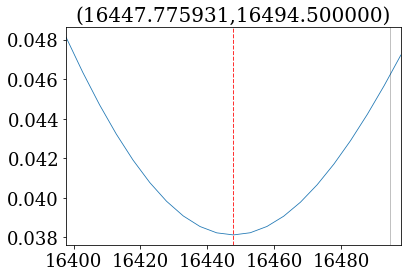

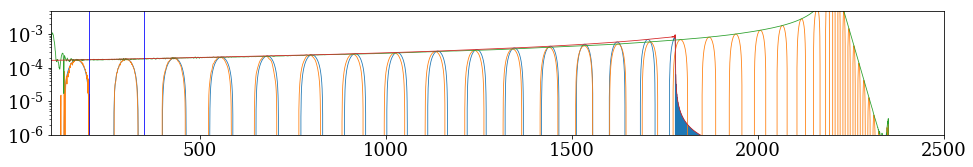

In [18]:
s.__calc_l2m2_hybrid_params__(plot=True)

### Visualize over-lapping region between NR and PN

0.0218109007546


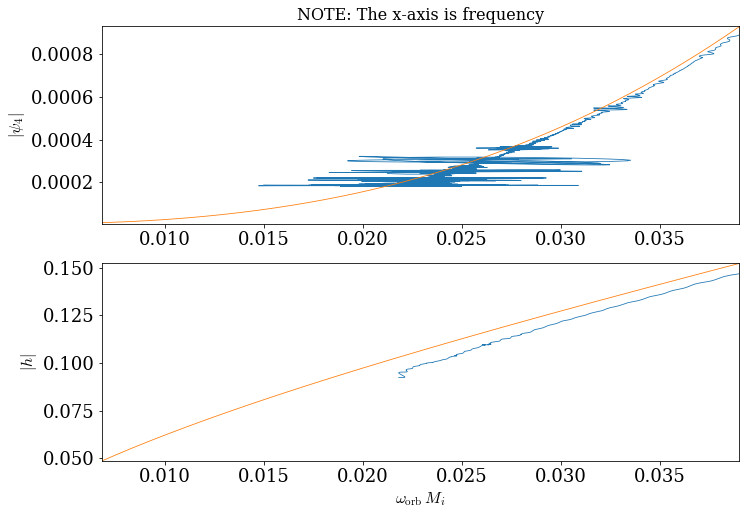

In [60]:
fig = figure( figsize=2*figaspect(.7) )
l,m = 2,2

subplot(2,1,1)
print nro.lm[l,m]['strain'].dphi[nro.remnant['mask']][0]/m
plot(nro.lm[l,m]['psi4'].dphi[nro.remnant['mask']]/m,nro.lm[l,m]['psi4'].amp[nro.remnant['mask']])
plot(pno.wM,abs(pno.psi4[l,m]))
xlim( lim(pno.wM) )
ylim(lim(abs(pno.psi4[l,m])))
title('NOTE: The x-axis is frequency')
ylabel(r'$|\psi_4|$')

subplot(2,1,2)
plot(nro.lm[l,m]['strain'].dphi[nro.remnant['mask']]/m,nro.lm[l,m]['strain'].amp[nro.remnant['mask']])
plot(pno.wM,abs(pno.h[l,m]))
xlim( lim(pno.wM) )
ylim(lim(abs(pno.h[l,m])))
# yscale('log')
ylabel(r'$|h|$'); xlabel(r'$\omega_\mathrm{orb}\,M_i$');
# ylim( [0,1e-3] )

### Try to find time alignment using frequency and ampltiude

(notebook)>> Creating a rational model relating NR frequency and amplitude within desired region
[ 0.0246217   0.04399459] [ 0.02462488  0.04400471]
0.0246216960615 0.0291454565181


/Users/book/anaconda2/lib/python2.7/site-packages/matplotlib/lines.py:1168: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if np.any(self._markerfacecolor != fc):


f = lambda x0: 3.09502817e-02  +  5.34901386e-03 * (  8.86609867e+03*(x0) + -6.80670001e+06*(x0*x0) + 3.38304276e+09*(x0*x0*x0) + -3.01747614e+00 ) / ( 1.0 +  3.05507660e+08*(x0*x0*x0) )
[ 2628.5  3307. ]


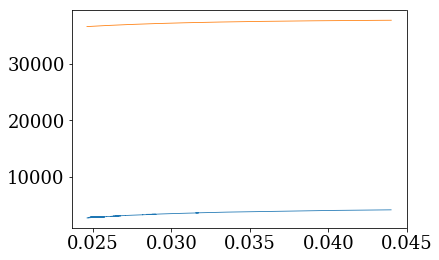

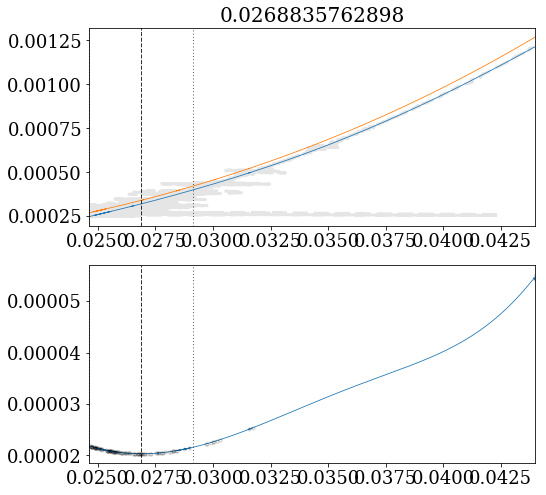

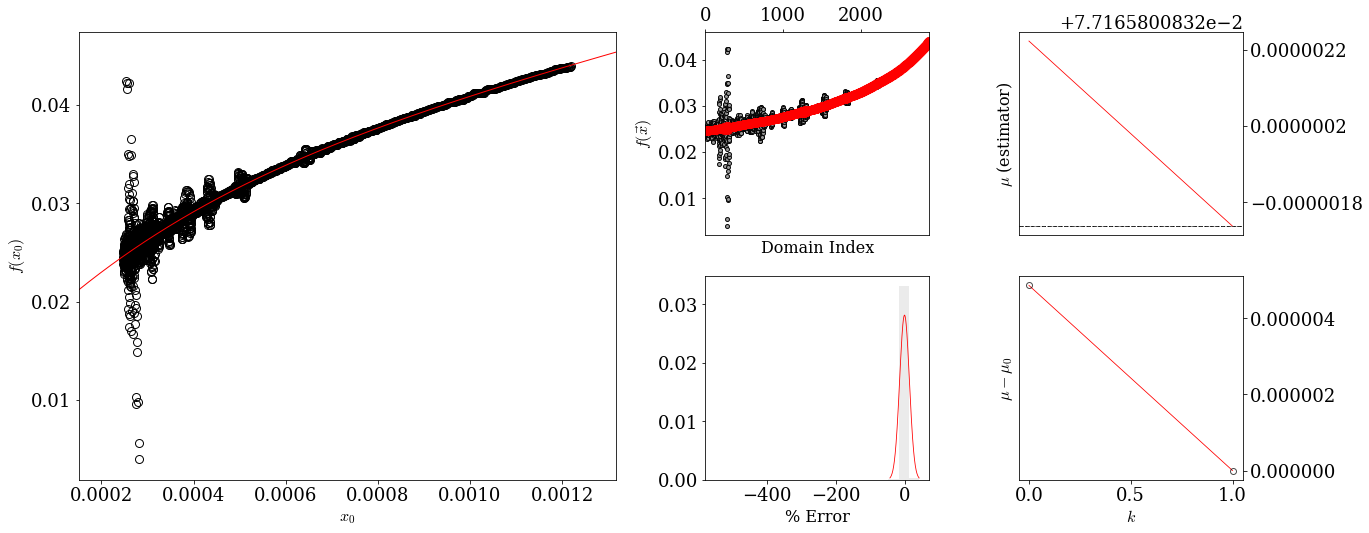

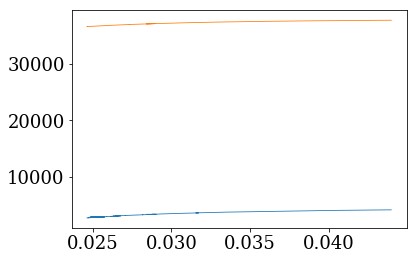

In [49]:
#
from numpy import hstack,mean,diff,argmin,argmax,sign
from scipy.interpolate import InterpolatedUnivariateSpline as spline

#
nrt = nro.lm[l,m]['psi4'].t[nro.remnant['mask']]
nrw = nro.lm[l,m]['psi4'].dphi[nro.remnant['mask']]/m
nra = nro.lm[l,m]['psi4'].amp[nro.remnant['mask']]

#
k = sign(m)*nrw>0
nrw = nrw[k]
nra = nra[k]
nrt = nrt[k]

#
pnw = pno.wM
pna = abs(pno.psi4[l,m])
pnt = pno.t

# ~-~-~~-~-~~-~-~~-~-~~-~-~~-~-~- #
wmin,wmax = min(nrw),max(pnw)
dw = min(diff(nrw)[diff(nrw)>0])
#
k = (nrw>=wmin) & (nrw<=wmax)
nrw = nrw[k];nra = nra[k];nrt = nrt[k]
#
k = (pnw>=wmin) & (pnw<=wmax)
pnw = pnw[k];pna = pna[k];pnt = pnt[k]
# ~-~-~~-~-~~-~-~~-~-~~-~-~~-~-~- #

# Model the NR frequency as a rational function -- FOR the purpose of finding a common frequency region
alert('Creating a rational model relating NR frequency and amplitude within desired region')
numerator_symbols = ['0','00','000']
denominator_symbols = ['000']
bar = mvrfit(nra,nrw,numerator_symbols,denominator_symbols,verbose=True)
nrw_ = nrw
nrw = bar.eval(nra)

# ~-~-~~-~-~~-~-~~-~-~~-~-~~-~-~- #
wmin,wmax = min(nrw),max(pnw)
dw = min(diff(nrw)[diff(nrw)>0])
#
k = (nrw>=wmin) & (nrw<=wmax)
nrw = nrw[k];nra = nra[k];nrt = nrt[k];nrw_ = nrw_[k]
#
k = (pnw>=wmin) & (pnw<=wmax)
pnw = pnw[k];pna = pna[k];pnt = pnt[k]
# ~-~-~~-~-~~-~-~~-~-~~-~-~~-~-~- #

figure()
plot( nrw, nrt )
plot( pnw, pnt )

# Evaluate PN data over NR domain via interpolant 
print lim(nrw), lim(pnw)
pnw_ = pnw.copy(); pnt_ = pnt.copy()
pna = spline(pnw,pna)(nrw)
pnt = spline(pnw,pnt)(nrw)
pnw = nrw 
# pnt = nrt

#
da = pna-nra

kmin = argmin(da)
vals,inds = findpeaks(-da)
# Ignore boundaries
msk = (inds>0) & (inds<len(da))
vals=vals[msk];inds=inds[msk]
w0 = nrw[ inds[argmax(vals)] ]

# -~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~ #
# Define frequencies for the hybridization region 
left_w = wmin 
right_w = wmin + 2*(w0-wmin)
print left_w,right_w
# -~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~-~ #

#
figure( figsize=2*figaspect(1) )

subplot(2,1,1)
plot( nrw_,nra, color='k',alpha=0.1,lw=3,ls='--' )
plot( nrw,nra )
plot( pnw,pna )
axvline(w0,ls='--',color='k')
axvline(left_w,ls=':',color='k')
axvline(right_w,ls=':',color='k')
xlim([wmin,wmax])
title(w0)

subplot(2,1,2)
plot( nrw,da )
plot( nrw[inds], da[inds], '.k', mfc='none', alpha=0.2 )
xlim([wmin,wmax])
axvline(w0,ls='--',color='k')
axvline(left_w,ls=':',color='k')
axvline(right_w,ls=':',color='k')

# print lim(nrw),wmax,nrt[ nrw>=right_w/2 ][0]

#
bar.plot()
print bar
left_t,right_t = lim(pnt[ (pnw>=left_w) & (pnw<=right_w) ])-pnt[0]+nrt[0]
print lim(nrt[ (nrw>=left_w) & (nrw<=right_w) ])
figure()
plot( nrw, nrt )
plot( pnw, pnt )
# plot( pnt-pnt[0]+nrt[0], pna )
# axvline( left_t )
# axvline( right_t )


0.0291454565181
0.0260389356809 0.0291454565181
2628.5 2883.68897201
-34056.3456509


[Text(0,1,u'0.025'), Text(0,1,u'0.029')]

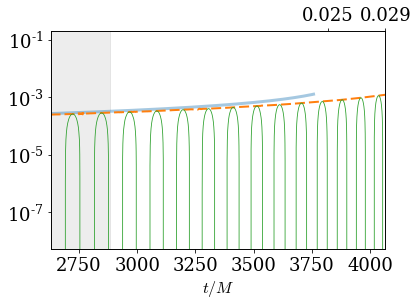

In [50]:
# define the window region in frequency to start at wmin, and end when w=wmin+2*(w0-wmin)=2*w0-wmin
# The time domain coordinates will be such that tmax-tmin >= 2 wavelengths of w0
from numpy import pi,linspace

#
figure()
ax1 = subplot(111)
ax2 = ax1.twiny()

#
reg = {}
reg['wmin'] = left_w*abs(m)
reg['wmax'] = right_w*abs(m)
print  right_w

pn_left_t  = spline( pno.wM, pno.t )(left_w) # NOTE that it IS correct to not scae by m here -- pn.wM is orbital frequency
nr_left_t  = nrt[ nrw >= left_w ][0]

t_width = (2*pi/left_w)
nr_right_t = nr_left_t+t_width
# nr_right_t  = nrt[ nrw >= right_w ][0]
print nrw[ nrt >= nr_right_t ][0],right_w
print nr_left_t, nr_right_t

pn_shift = -pn_left_t+nr_left_t
print pn_shift
sca(ax1)
plot( pno.t+pn_shift, abs(pno.psi4[l,m]), lw=3, alpha=0.4 )
# plot( pno.t-pn_left_t+nr_left_t, pno.psi4[l,m].real, 'k' )
plot( nro.lm[l,m]['psi4'].t, nro.lm[l,m]['psi4'].amp, '--', lw=2 )
plot( nro.lm[l,m]['psi4'].t, nro.lm[l,m]['psi4'].plus )
yscale('log',nonposy='clip')

yl = ylim()
fill_betweenx( yl, nr_left_t, nr_right_t, color='k', alpha=0.07 )

# xlim( nr_left_t-100,max(nro.lm[l,m]['psi4'].t) )
xlim( lim(nrt) )
ylim(yl);

xlabel('$t/M$')
ylabel('')

#
sca(ax2)
xlim( lim(nrw) )
# worbtk = linspace( min(pnw), max(pnw), 3 )
worbtk = linspace( left_w, right_w, 2 )
x2tick = spline(pnw_,pnt_-pn_left_t+nr_left_t)(worbtk)
ax2.set_xticks( x2tick )
ax2.set_xticklabels( ['%1.3f'%k for k in worbtk] )



(0.024621696061508588, 0.2440047118008016)

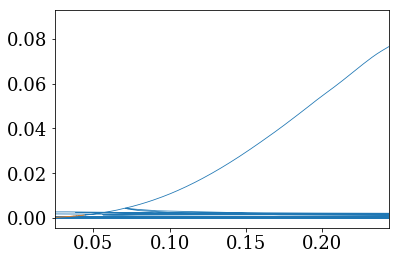

In [51]:
plot( nro.lm[l,m]['psi4'].dphi/m, nro.lm[l,m]['psi4'].amp )
plot( pno.wM, abs(pno.psi4[l,m]) )
xlim([wmin,wmax+0.2])

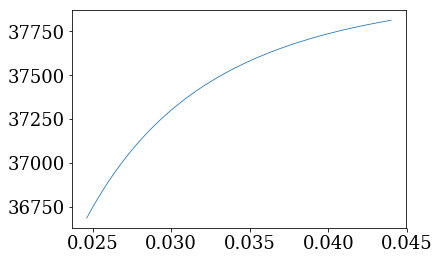

In [52]:
plot(pnw_,pnt_)